In [1]:
pip install textblob

In [2]:
from textblob import TextBlob

In [5]:
import pandas as pd

df = pd.read_csv('beats_reviews_full.csv')

In [6]:
# polarity and subjectivity column
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

         asin       review_id  \
0  B0D4SX9RC6  R25X0TE59JOMS3   
1  B0D4SX9RC6   RA0QY335MJ1GL   
2  B0D4SX9RC6  R1F7DIMOX9LTJU   
3  B0D4SX9RC6  R2SW6Y89GDH3FG   
4  B0D4SX9RC6  R3R7XPH8WUAWNW   

                                               title         author  rating  \
0  5.0 out of 5 stars Used Beats Pill 2024 still ...  Leila L’Abate       5   
1  5.0 out of 5 stars So much power in a compact ...         LyneeZ       5   
2        5.0 out of 5 stars Beats is always the best          Abbas       5   
3  5.0 out of 5 stars I'm finding I have to charg...    wanda lyons       5   
4       5.0 out of 5 stars The Kim Gray is excellent         Butter       5   

                                             content  \
0  I bought this used in "acceptable" condition, ...   
1  Just like most others who have reviewed this i...   
2  As always, beats always beat the sound, lookin...   
3  Hello. This product is awesome. I listen to mu...   
4  This is a great sounding Bluetooth speaker.

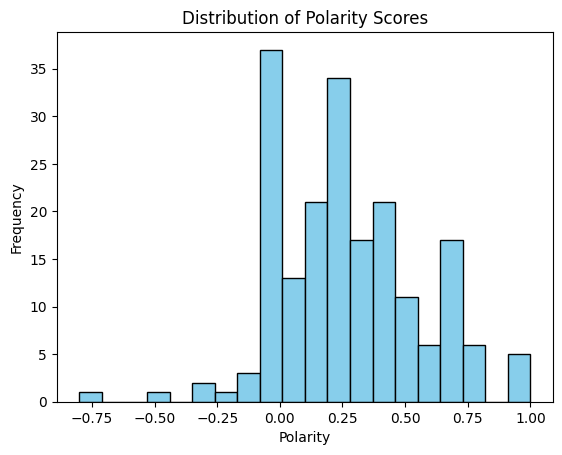

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

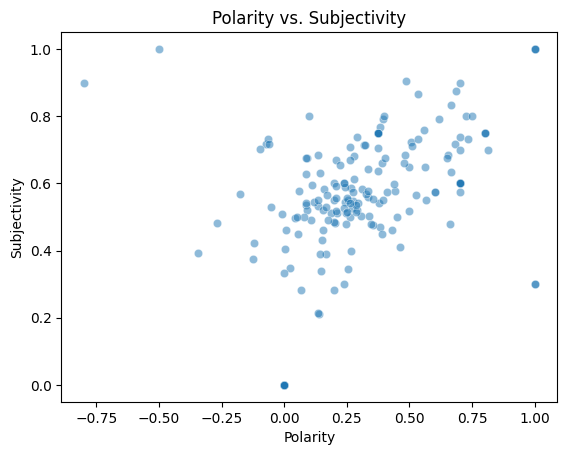

In [11]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='polarity', y='subjectivity', data=df, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [23]:
def categorize_sentiment(polarity):
    if polarity > 0.65:
        return 'Very Positive'
    elif polarity > 0.2:
        return 'Positive'
    elif polarity < -0.65:
        return 'Very Negative'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# apply categorization
df['sentiment'] = df['polarity'].apply(categorize_sentiment)

# count number of each sentiment
sentiment_count = df['sentiment'].value_counts().reset_index()
print(sentiment_count)

       sentiment  count
0       Positive     87
1        Neutral     78
2  Very Positive     27
3       Negative      3
4  Very Negative      1


<ipython-input-24-99a7858f2520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=sentiment_count, palette='pastel')


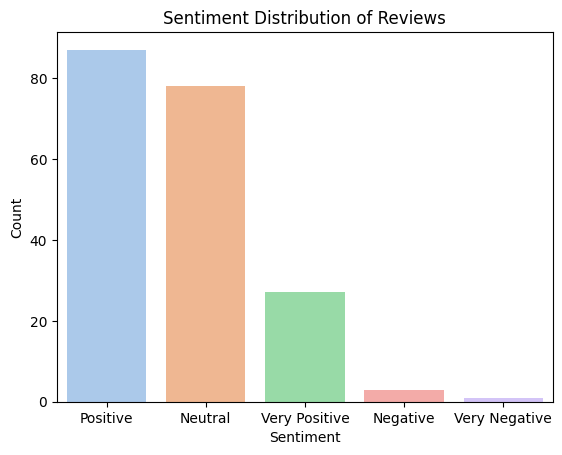

In [24]:
sentiment_count.columns = ['sentiment', 'count']

sns.barplot(x='sentiment', y='count', data=sentiment_count, palette='pastel')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

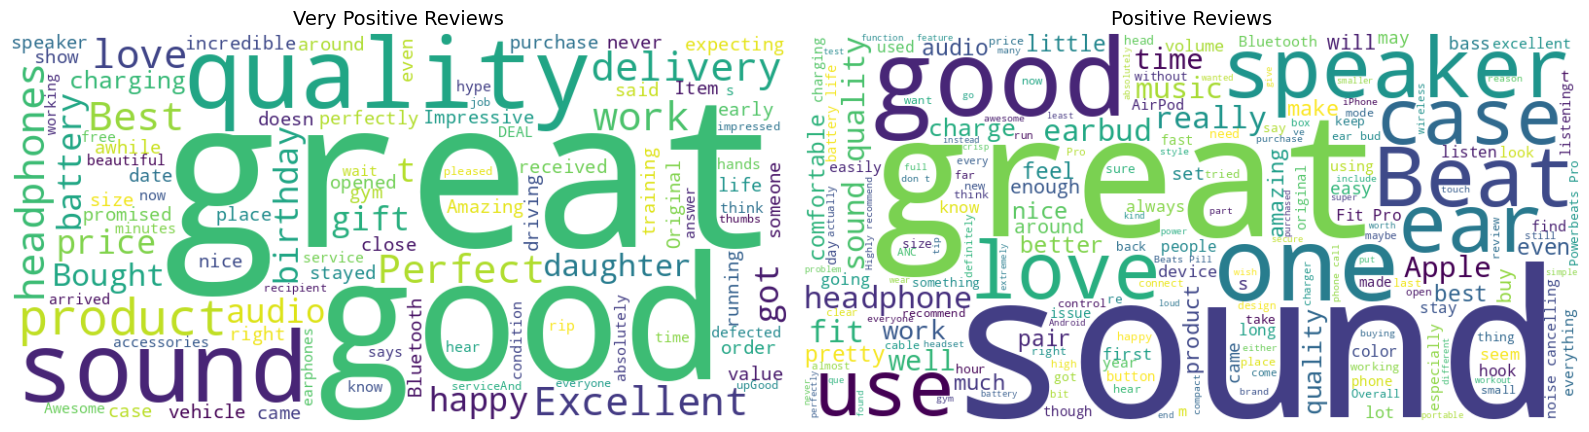

In [28]:
# separate positive / very positive
very_positive_reviews = " ".join(df[df['sentiment'] == 'Very Positive']['content'])
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['content'])

# generate word clouds
very_positive_wc = WordCloud(background_color='white', width=800, height=400).generate(very_positive_reviews)
positive_wc = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# display
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(very_positive_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("Very Positive Reviews", fontsize=14)

axs[1].imshow(positive_wc, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Positive Reviews", fontsize=14)

plt.tight_layout()
plt.show()

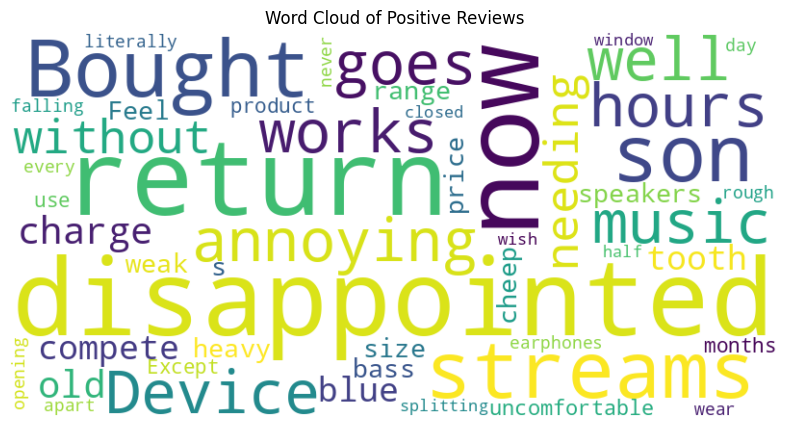

In [20]:
from wordcloud import WordCloud

# negative reviews
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()